In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm, poisson
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm
import corner

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
vel_dir = join(root_data_dir, "Velocity-Distribution-no")
vel_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no'

In [8]:
name = "PHI"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/PHI already exist. Good to go!


In [9]:
files = glob(join(vel_dir, "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.37)_(0.38).npy',
 '/home2/s20321005/T

In [10]:
names = [f.split("/")[-1] for f in files]
names

['gaia_(-0.10)_(0.11).npy',
 'gaia_(0.11)_(0.16).npy',
 'gaia_(0.16)_(0.20).npy',
 'gaia_(0.20)_(0.24).npy',
 'gaia_(0.24)_(0.27).npy',
 'gaia_(0.27)_(0.29).npy',
 'gaia_(0.29)_(0.31).npy',
 'gaia_(0.31)_(0.33).npy',
 'gaia_(0.33)_(0.35).npy',
 'gaia_(0.35)_(0.37).npy',
 'gaia_(0.37)_(0.38).npy',
 'gaia_(0.38)_(0.40).npy']

In [11]:
import re

# capture string within parenthesis ()

c = [re.findall(r'\((.*?)\)', name) for name in names]
c0 = np.array([float(ci[0]) for ci in c])
c1 = np.array([float(ci[1]) for ci in c])
c = (c0+c1)/2
c

array([0.005, 0.135, 0.18 , 0.22 , 0.255, 0.28 , 0.3  , 0.32 , 0.34 ,
       0.36 , 0.375, 0.39 ])

In [12]:
labs = ['w0', 'log_sigmaw', 'q_sigmaw', 'log_a', 'q_a', 'log_phi']
labels = [r"$w_0$", r"$\log \sigma_w$", r"$q_w$", r"$\log a$", r"$q_a$", r"$\log \Phi$"]

file = files[0]
flat_samples = np.load(file)


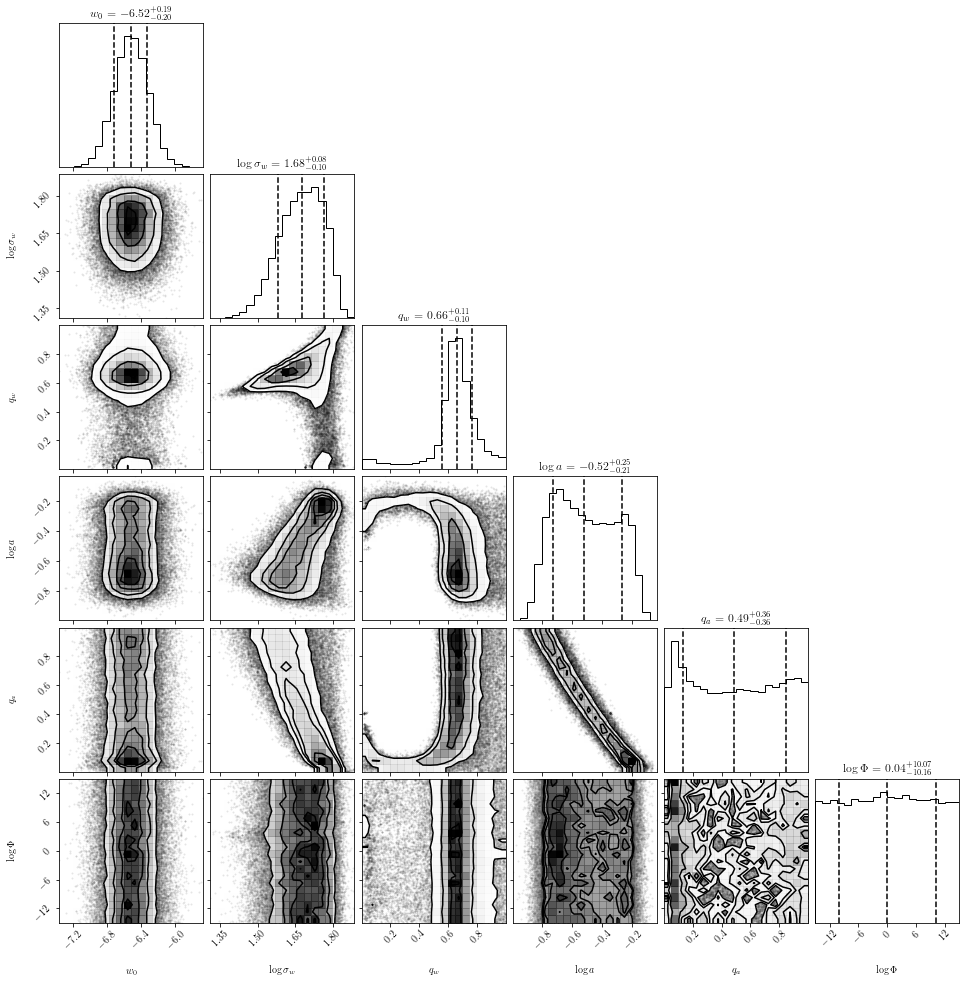

In [13]:
fig = corner.corner(
    flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True
);

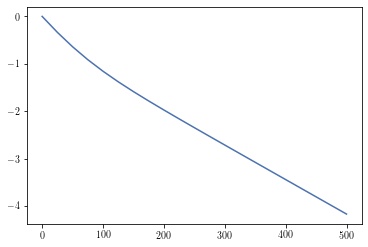

In [14]:
phi_max = 500
phis = np.linspace(0, phi_max, 21)
inds = np.random.randint(0, len(flat_samples), 5000)
log_sigmaw = flat_samples[inds[0], 1]
q_sigmaw = flat_samples[inds[0], 2]
log_a = flat_samples[inds[0], 3]
q_a = flat_samples[inds[0], 4]

sigmaw1 = np.exp(log_sigmaw)
sigmaw2 = sigmaw1 / q_sigmaw
a1 = np.exp(log_a)
a2 = a1 * q_a
atot = a1 + a2

nus = (a1*np.exp(-phis/sigmaw1**2) + a2*np.exp(-phis/sigmaw2**2))/atot

plt.plot(phis, np.log10(nus))
plt.show()

In [17]:
phis = np.linspace(1, phi_max, 1000)
N = len(flat_samples)
print(N)
log_zmod_phi = np.empty((N, len(phis)))
for i in tqdm(range(N)):
    th = flat_samples[i]
    log_sigmaw = th[1]
    q_sigmaw = th[2]
    log_a = th[3]
    q_a = th[4]
    sigmaw1 = np.exp(log_sigmaw)
    sigmaw2 = sigmaw1 / q_sigmaw
    a1 = np.exp(log_a)
    a2 = a1 * q_a
    atot = a1 + a2
    zmod_phi_i = (a1*np.exp(-phis/sigmaw1**2)+a2*np.exp(-phis/sigmaw2**2))/atot
    log_zmod_phi[i] = np.log(zmod_phi_i)
log_zmod_phi

60000


100%|██████████| 60000/60000 [00:04<00:00, 13012.43it/s]


array([[ -0.02508837,  -0.03758542,  -0.0500591 , ...,  -2.13188167,
         -2.13194813,  -2.13201459],
       [ -0.0272421 ,  -0.0408309 ,  -0.05440728, ..., -10.10383984,
        -10.11300169, -10.12216347],
       [ -0.02956511,  -0.04431426,  -0.05905096, ..., -10.91139852,
        -10.92123606, -10.93107353],
       ...,
       [ -0.03286332,  -0.04922525,  -0.06555149, ...,  -9.26081049,
         -9.26900333,  -9.27719618],
       [ -0.0251953 ,  -0.03777882,  -0.05036131, ..., -10.16835667,
        -10.1754811 , -10.18260302],
       [ -0.03185922,  -0.04772991,  -0.0635719 , ..., -10.46006942,
        -10.46965801, -10.47924659]])

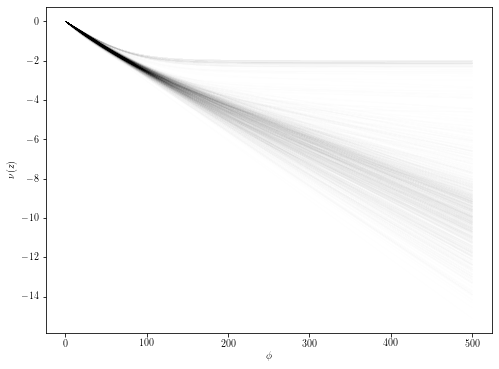

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(phis, log_zmod_phi[::60].T, 'k', alpha=0.005)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\nu(z)$')
plt.show()

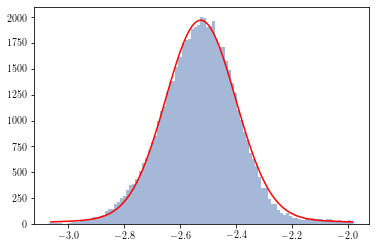

In [32]:
from scipy.stats import median_abs_deviation as mad_func
from scipy.optimize import curve_fit
from scipy.stats import norm

# def gaussian(x, mu, sigma1, sigma2, sigma3, a1, a2, a3):
#   return a1*norm.pdf(x, mu, sigma1)+a2*norm.pdf(x, mu, sigma2)+a3*norm.pdf(x, mu, sigma3)

def gaussian(x, mu, sigma1, sigma2, a1, a2):
  return a1*norm.pdf(x, mu, sigma1)+a2*norm.pdf(x, mu, sigma2)

phi_i = 100
index = np.argmin(np.abs(phis-phi_i))
log_zmod_phi_i = log_zmod_phi[:, index]
med = np.median(log_zmod_phi_i)
mad = mad_func(log_zmod_phi_i)
mask = np.abs(log_zmod_phi_i-med) < 6*mad
log_zmod_phi_i = log_zmod_phi_i[mask]

low = med-6*mad
high = med+6*mad
yedge = np.linspace(low, high, 100)
dy = yedge[1]-yedge[0]
ymid = (yedge[1:]+yedge[:-1])/2
ynum, _ = np.histogram(log_zmod_phi_i, bins=yedge)
# ynum
mask = ynum > 0
ynum = ynum[mask]
ymid = ymid[mask]

popt, _ = curve_fit(gaussian, ymid, ynum, p0=[-10, 5, 5, 1000, 1000])

# plot
plt.bar(ymid, ynum, width=dy, alpha=0.5)
plt.plot(ymid, gaussian(ymid, *popt), c="r")              

In [33]:
med = np.median(log_zmod_phi, axis=0)
mad = mad_func(log_zmod_phi, axis=0)
partition = 50
pred = np.empty((len(phis), 2, partition))
phi_mod = phis
for i, (log_zmod_phi_i, med_i, mad_i) in enumerate(zip(log_zmod_phi.T, med, tqdm(mad))):
    mask = np.abs(log_zmod_phi_i-med_i) < 6*mad_i
    log_zmod_phi_i = log_zmod_phi_i[mask]
    low = med_i-6*mad_i
    high = med_i+6*mad_i
    log_znum_edge = np.linspace(low, high, partition+1)
    dy = log_znum_edge[1]-log_znum_edge[0]
    log_znum_mod = (log_znum_edge[1:]+log_znum_edge[:-1])/2
    znum_weight, _ = np.histogram(log_zmod_phi_i, bins=log_znum_edge)
    total = znum_weight.sum()
    znum_weight = znum_weight/total
    pred_i = np.array([np.exp(log_znum_mod), znum_weight])
    pred[i] = pred_i

100%|█████████▉| 999/1000 [00:04<00:00, 214.77it/s]


# automate

In [34]:
pred.shape

(1000, 2, 50)

In [35]:
# check memory size of pred
pred.nbytes/1024**2 # MB

0.762939453125

In [36]:
files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/gaia_(0.37)_(0.38).npy',
 '/home2/s20321005/T

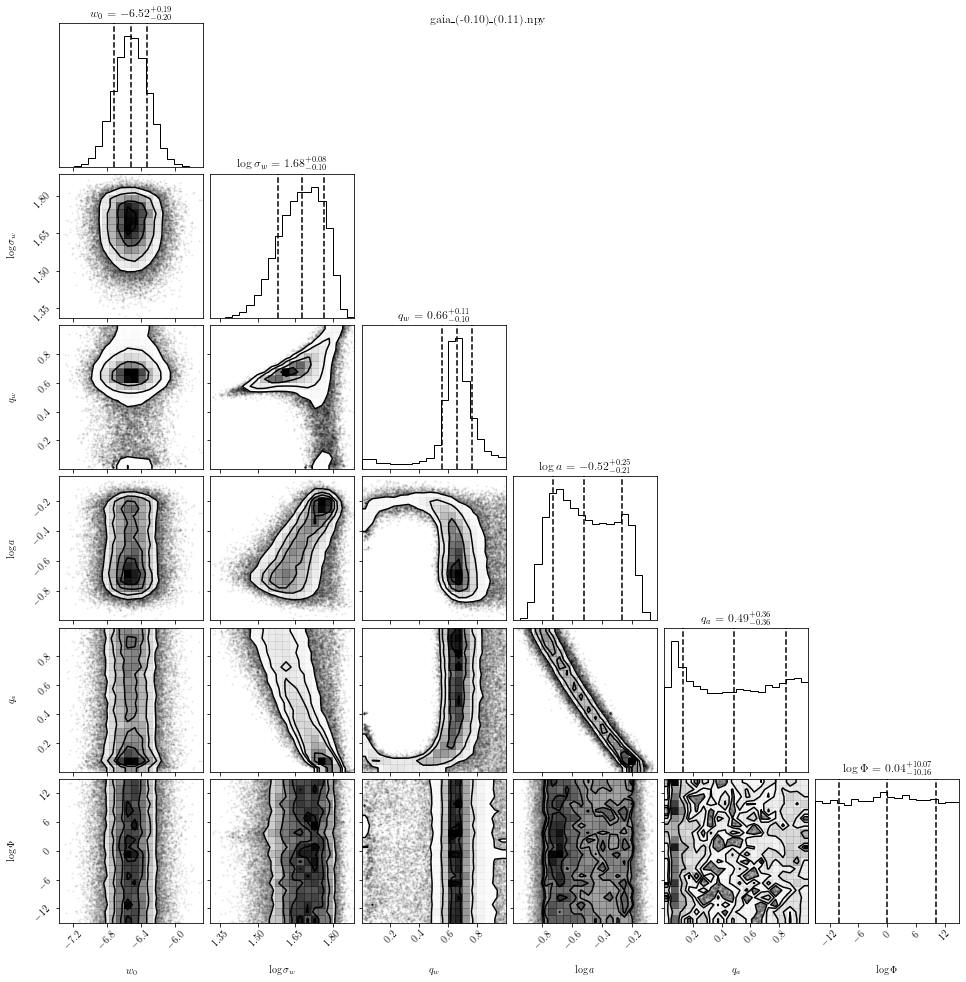

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13190.80it/s]


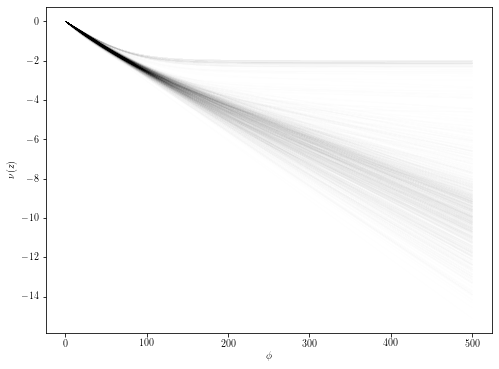

calculating histogram...


 88%|████████▊ | 882/1000 [00:04<00:00, 223.89it/s]

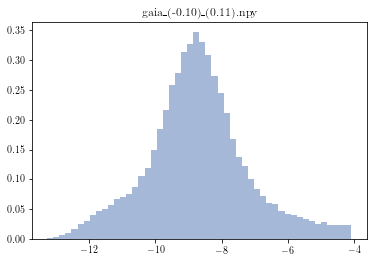

100%|█████████▉| 999/1000 [00:04<00:00, 201.57it/s]


done gaia_(-0.10)_(0.11).npy





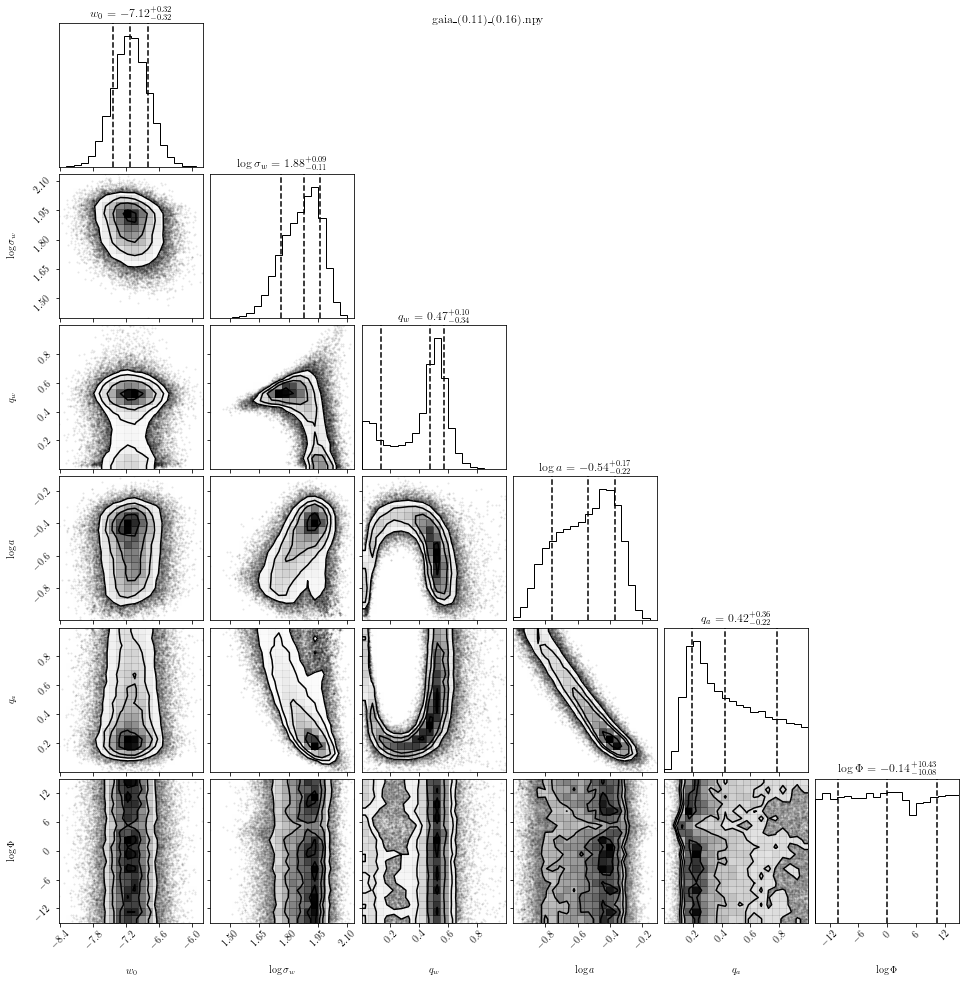

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 12791.79it/s]


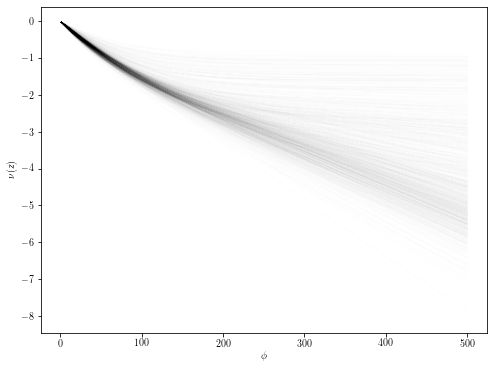

calculating histogram...


 90%|████████▉ | 895/1000 [00:04<00:00, 215.68it/s]

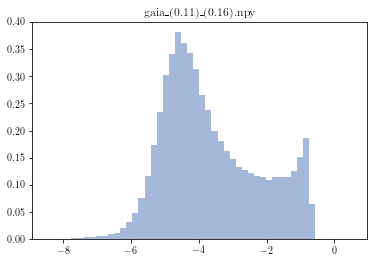

100%|█████████▉| 999/1000 [00:04<00:00, 210.00it/s]


done gaia_(0.11)_(0.16).npy





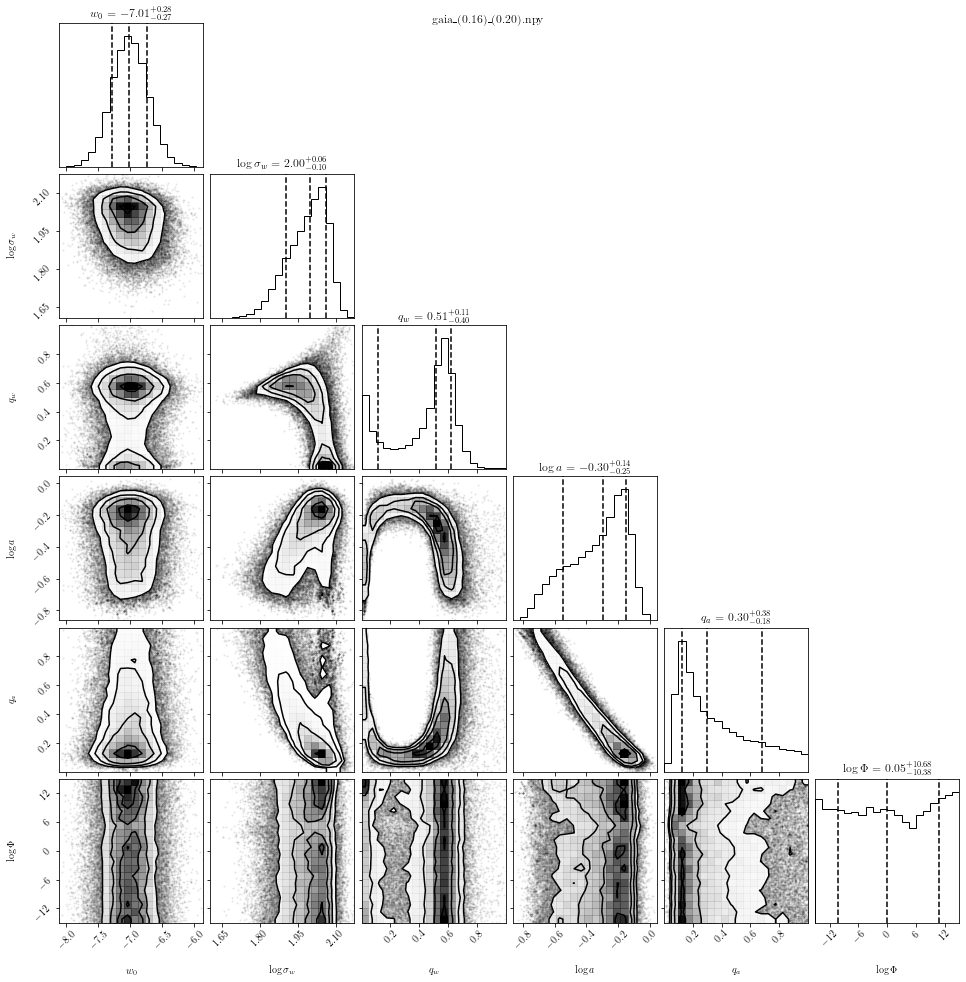

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13256.02it/s]


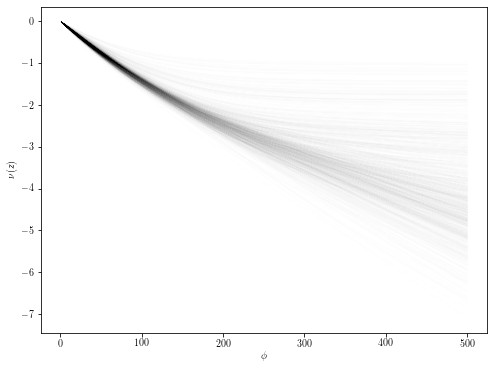

calculating histogram...


 89%|████████▉ | 889/1000 [00:03<00:00, 213.08it/s]

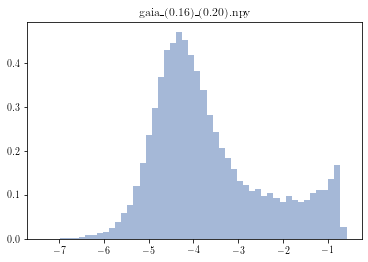

100%|█████████▉| 999/1000 [00:04<00:00, 215.99it/s]


done gaia_(0.16)_(0.20).npy





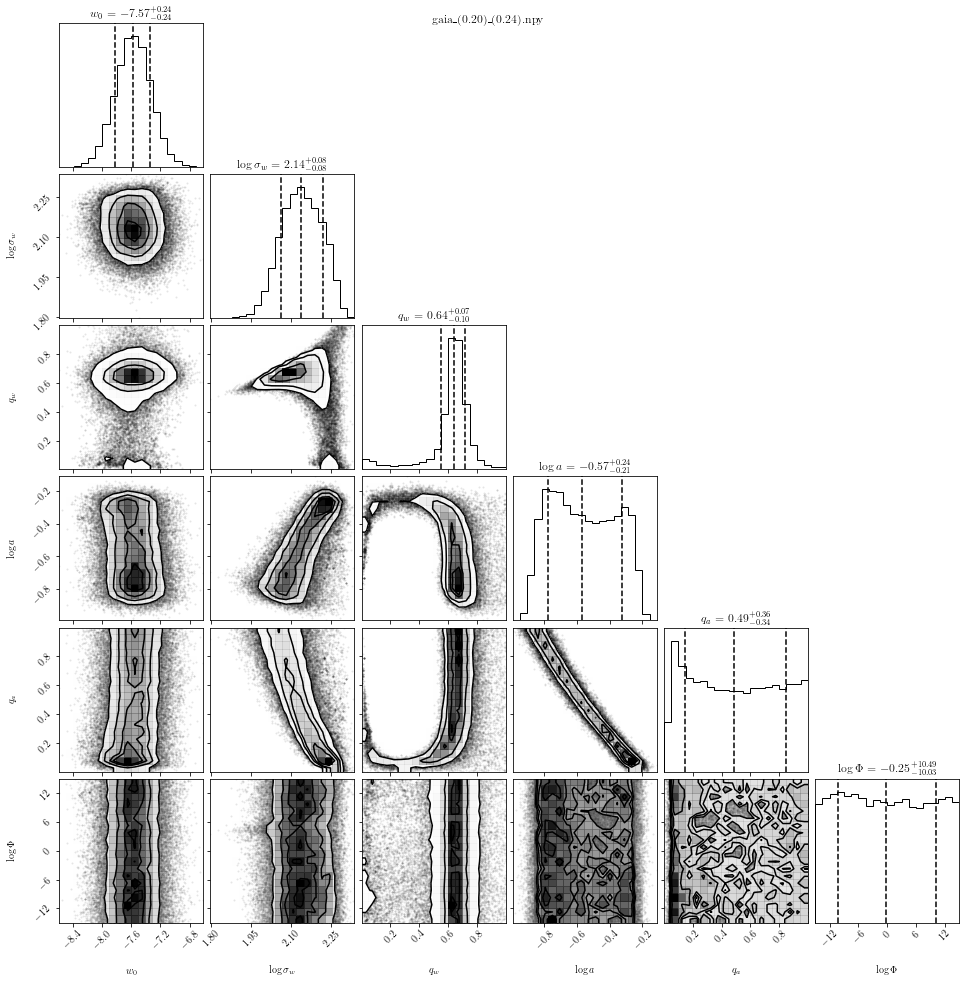

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 12953.56it/s]


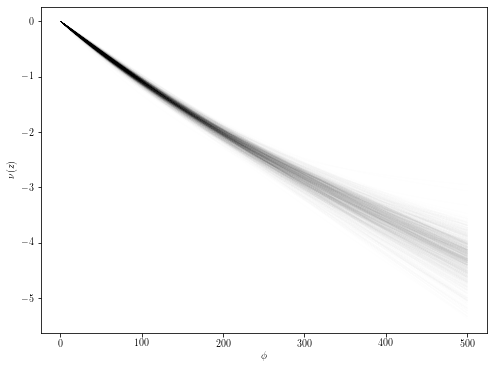

calculating histogram...


 90%|████████▉ | 895/1000 [00:04<00:00, 209.28it/s]

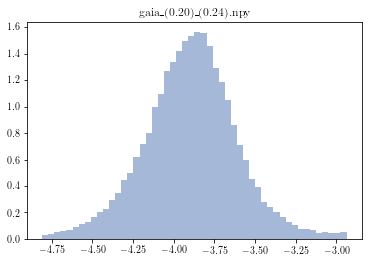

100%|█████████▉| 999/1000 [00:05<00:00, 182.92it/s]


done gaia_(0.20)_(0.24).npy





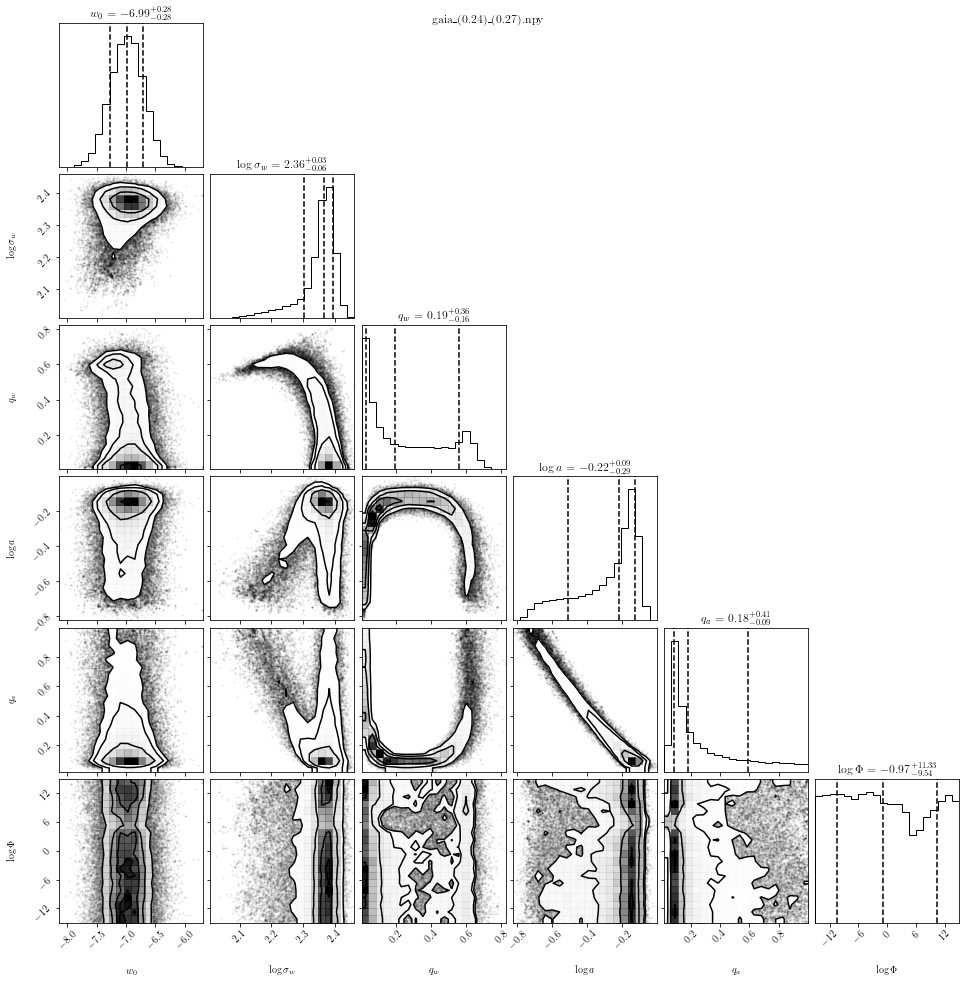

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 12763.24it/s]


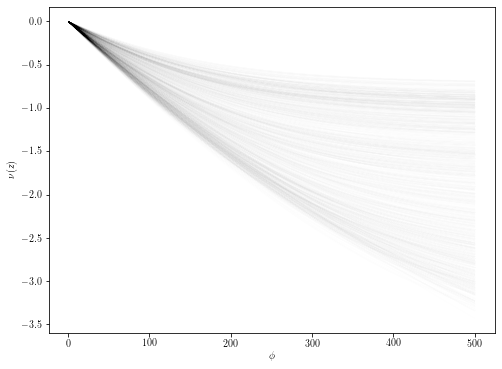

calculating histogram...


 90%|████████▉ | 898/1000 [00:04<00:00, 213.60it/s]

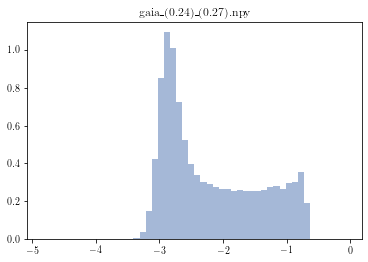

100%|█████████▉| 999/1000 [00:04<00:00, 209.02it/s]


done gaia_(0.24)_(0.27).npy





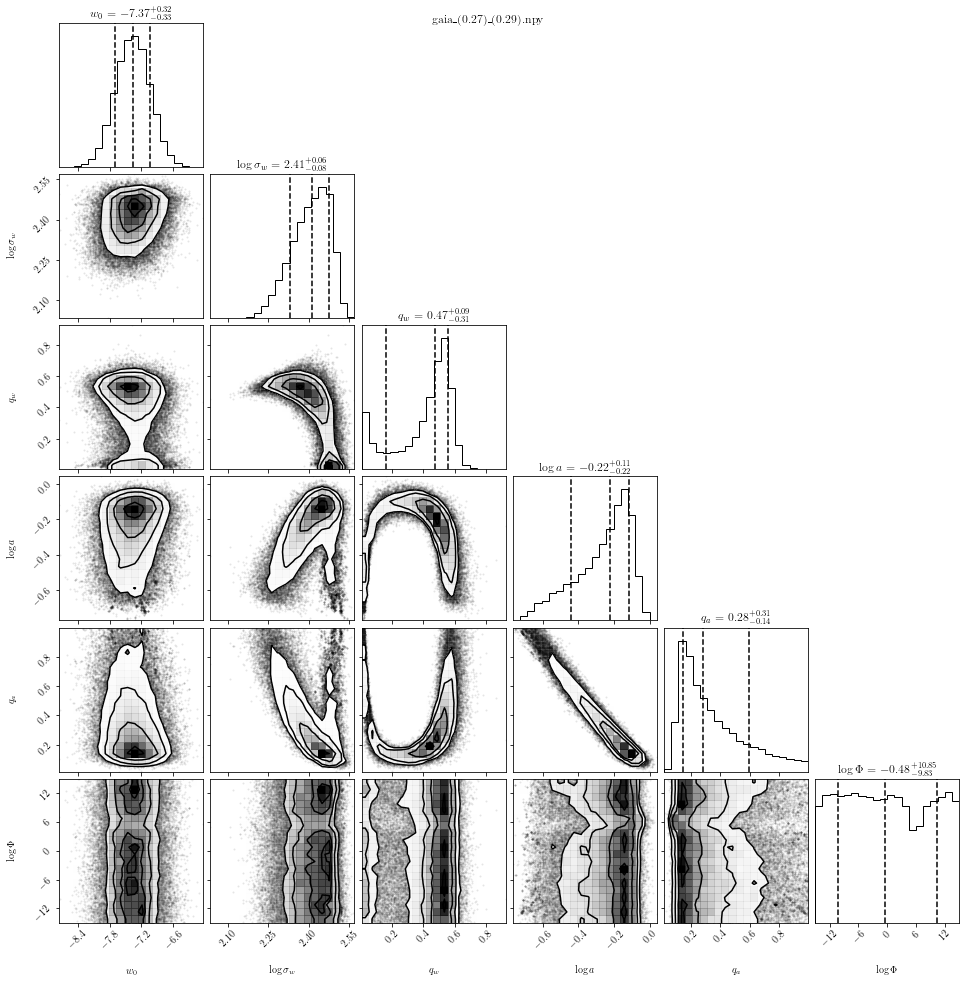

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13351.79it/s]


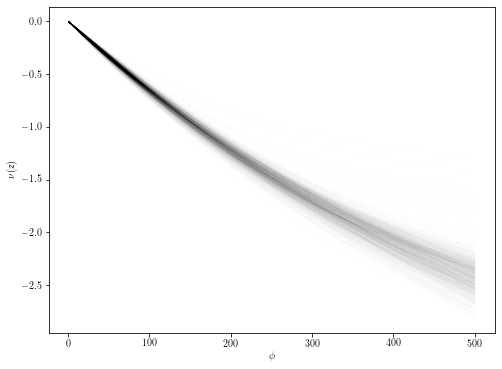

calculating histogram...


 88%|████████▊ | 881/1000 [00:03<00:00, 244.77it/s]

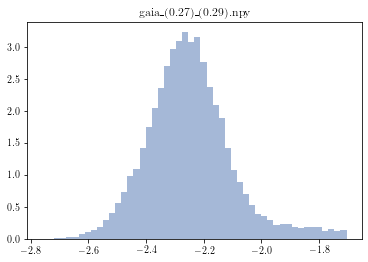

100%|█████████▉| 999/1000 [00:04<00:00, 222.24it/s]


done gaia_(0.27)_(0.29).npy





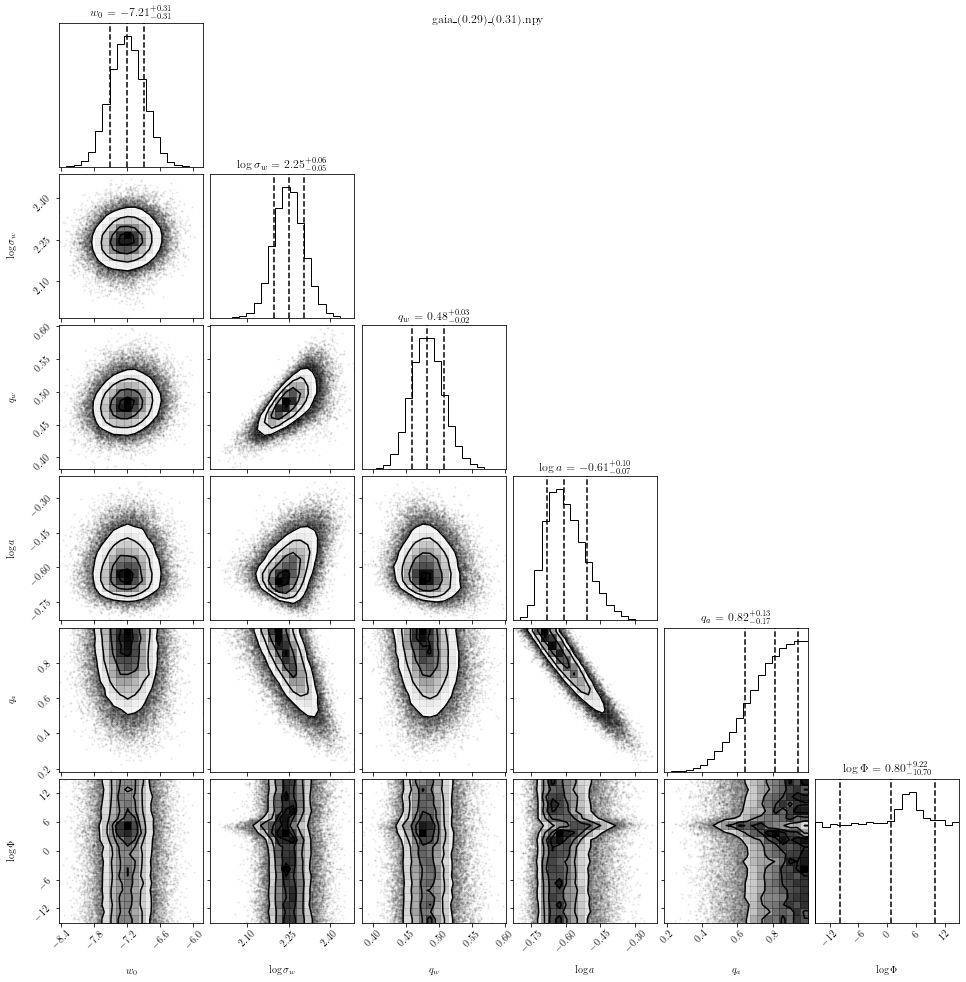

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13155.98it/s]


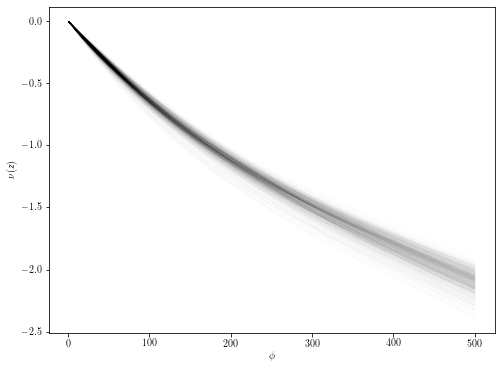

calculating histogram...


 90%|█████████ | 900/1000 [00:04<00:00, 211.18it/s]

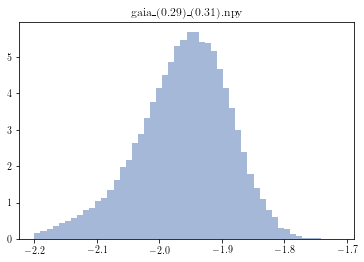

100%|█████████▉| 999/1000 [00:05<00:00, 183.67it/s]


done gaia_(0.29)_(0.31).npy





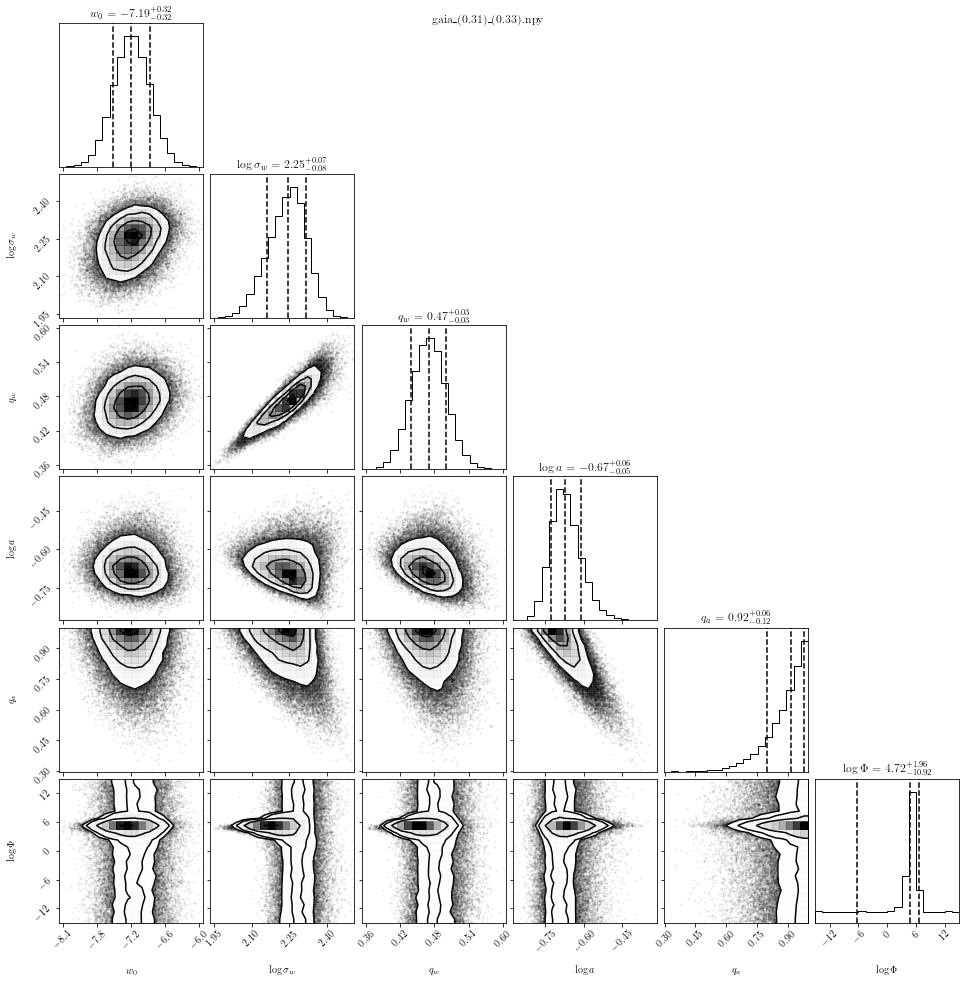

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13200.10it/s]


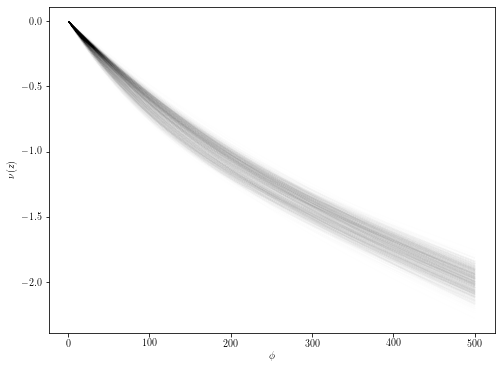

calculating histogram...


 90%|████████▉ | 896/1000 [00:04<00:00, 210.07it/s]

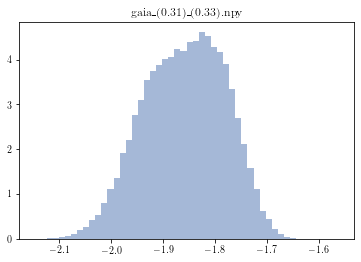

100%|█████████▉| 999/1000 [00:04<00:00, 200.21it/s]


done gaia_(0.31)_(0.33).npy





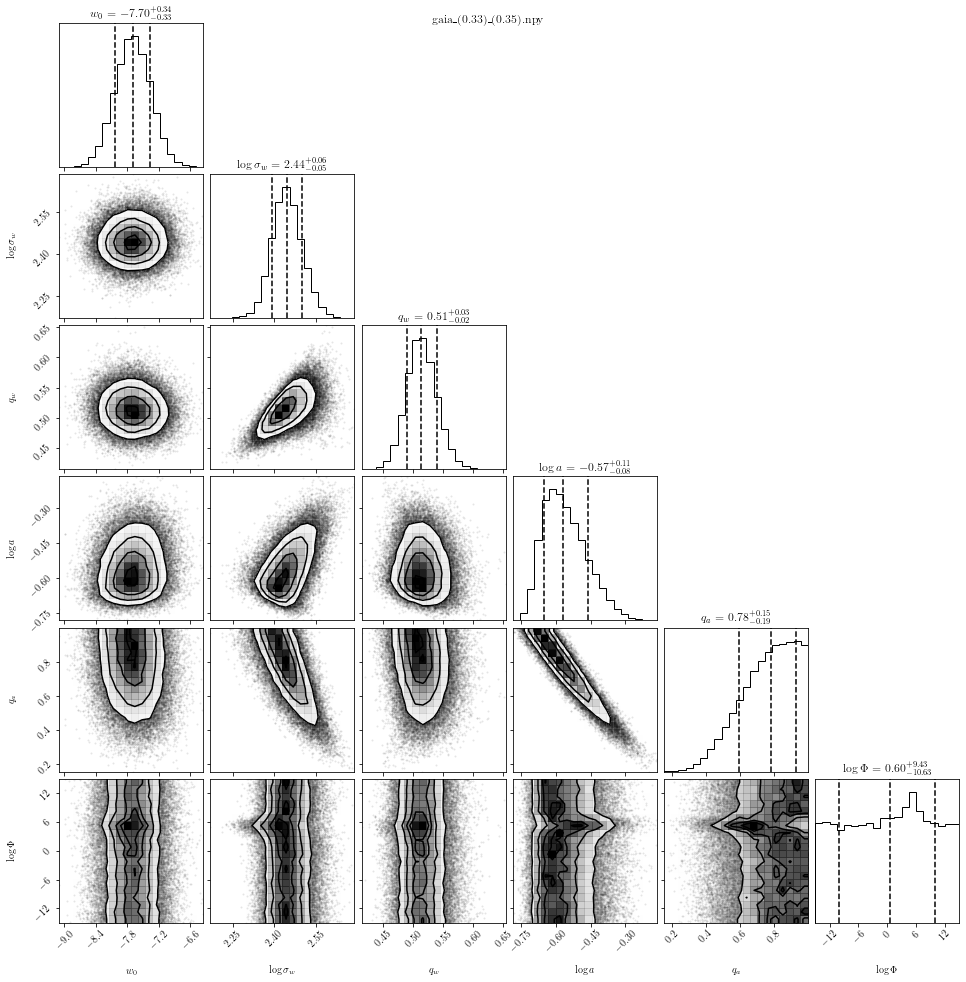

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 12991.32it/s]


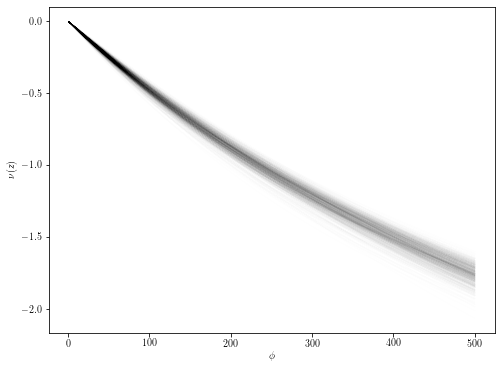

calculating histogram...


 88%|████████▊ | 879/1000 [00:04<00:00, 216.89it/s]

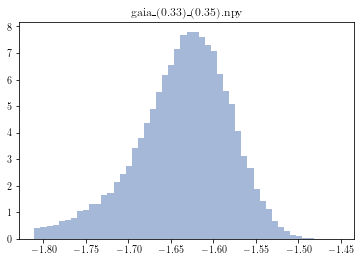

100%|█████████▉| 999/1000 [00:04<00:00, 201.51it/s]


done gaia_(0.33)_(0.35).npy





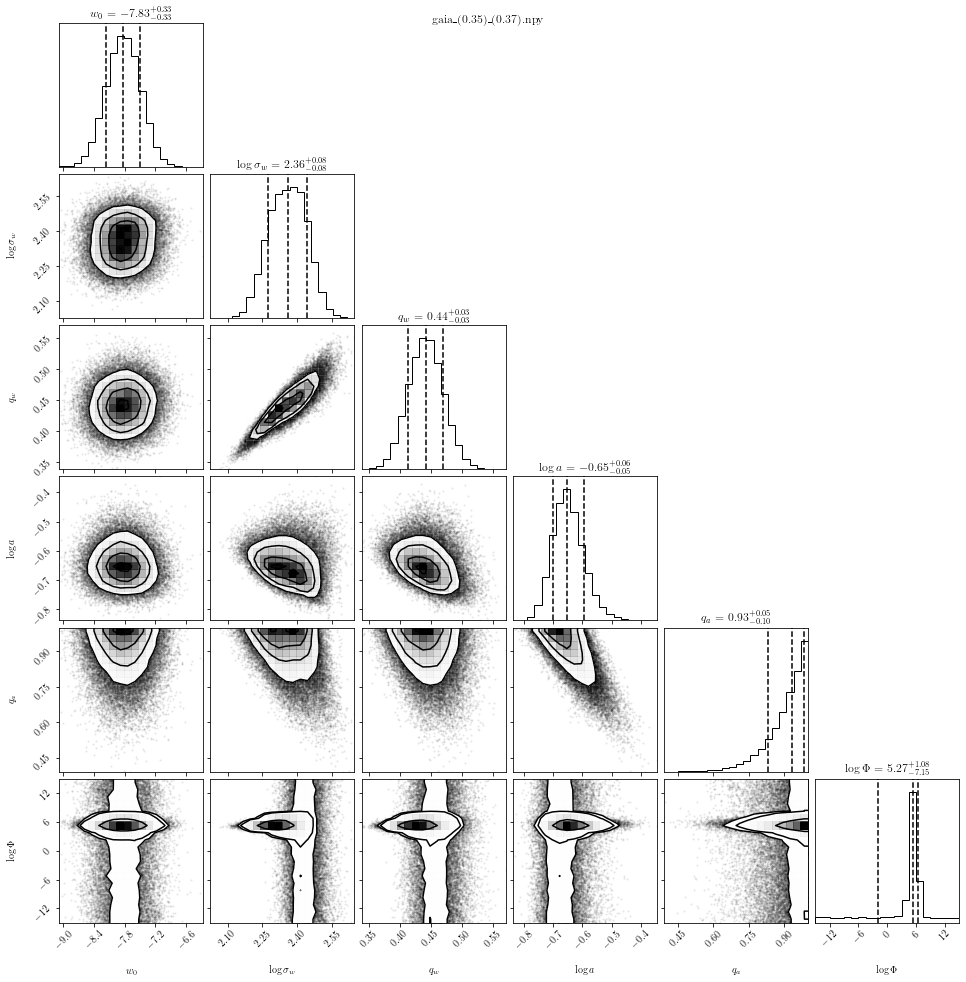

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13288.74it/s]


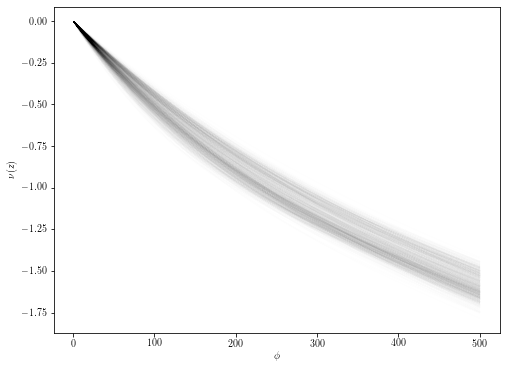

calculating histogram...


 90%|████████▉ | 899/1000 [00:04<00:00, 212.43it/s]

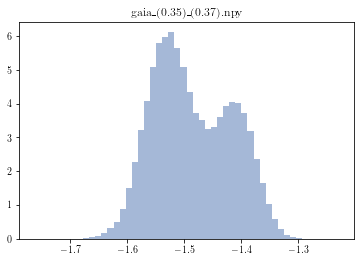

100%|█████████▉| 999/1000 [00:05<00:00, 197.38it/s]


done gaia_(0.35)_(0.37).npy





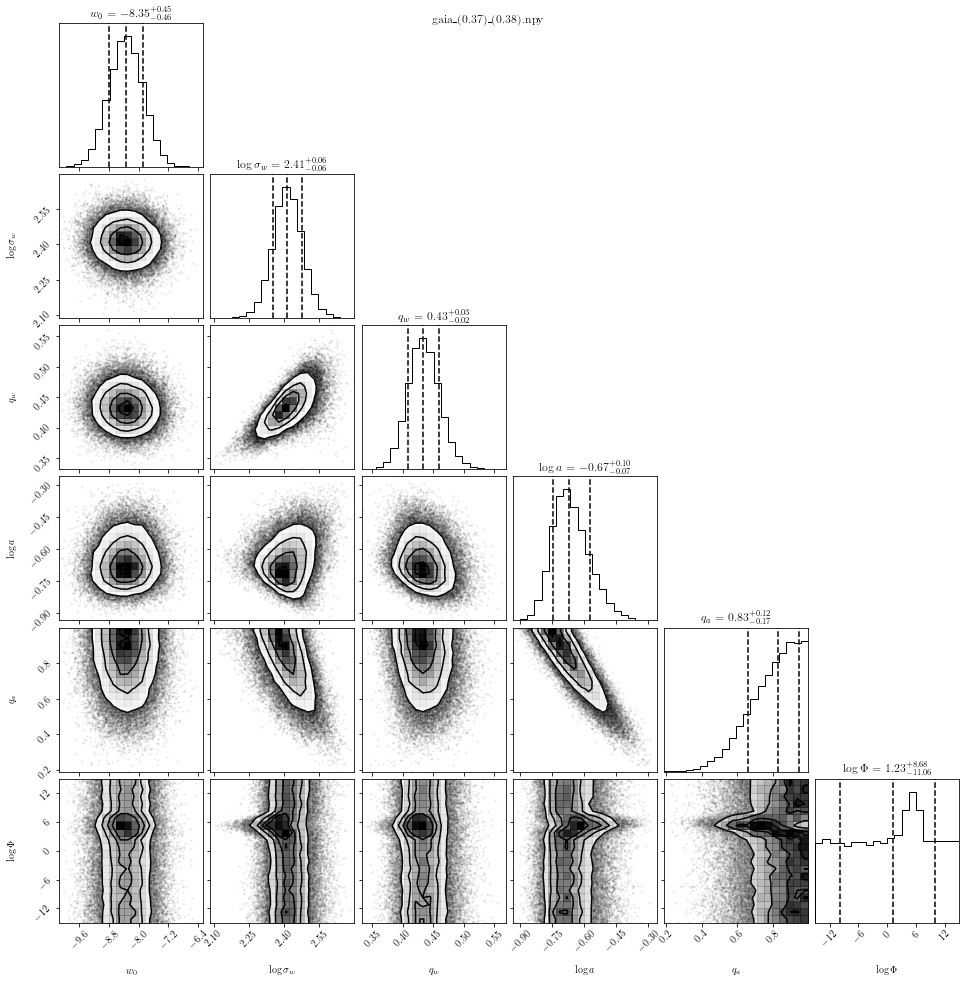

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13332.81it/s]


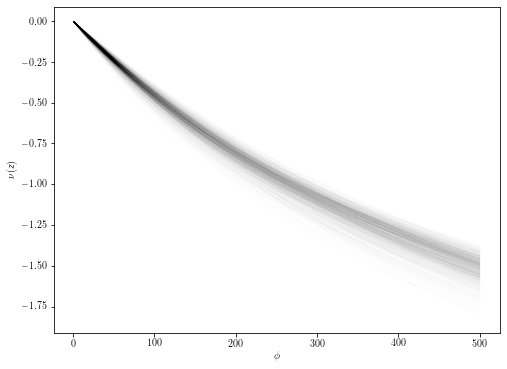

calculating histogram...


 89%|████████▉ | 891/1000 [00:04<00:00, 203.39it/s]

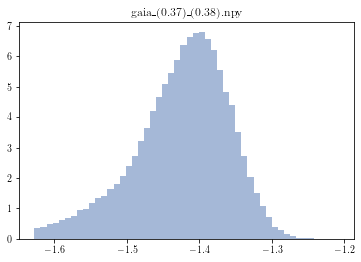

100%|█████████▉| 999/1000 [00:05<00:00, 198.20it/s]


done gaia_(0.37)_(0.38).npy





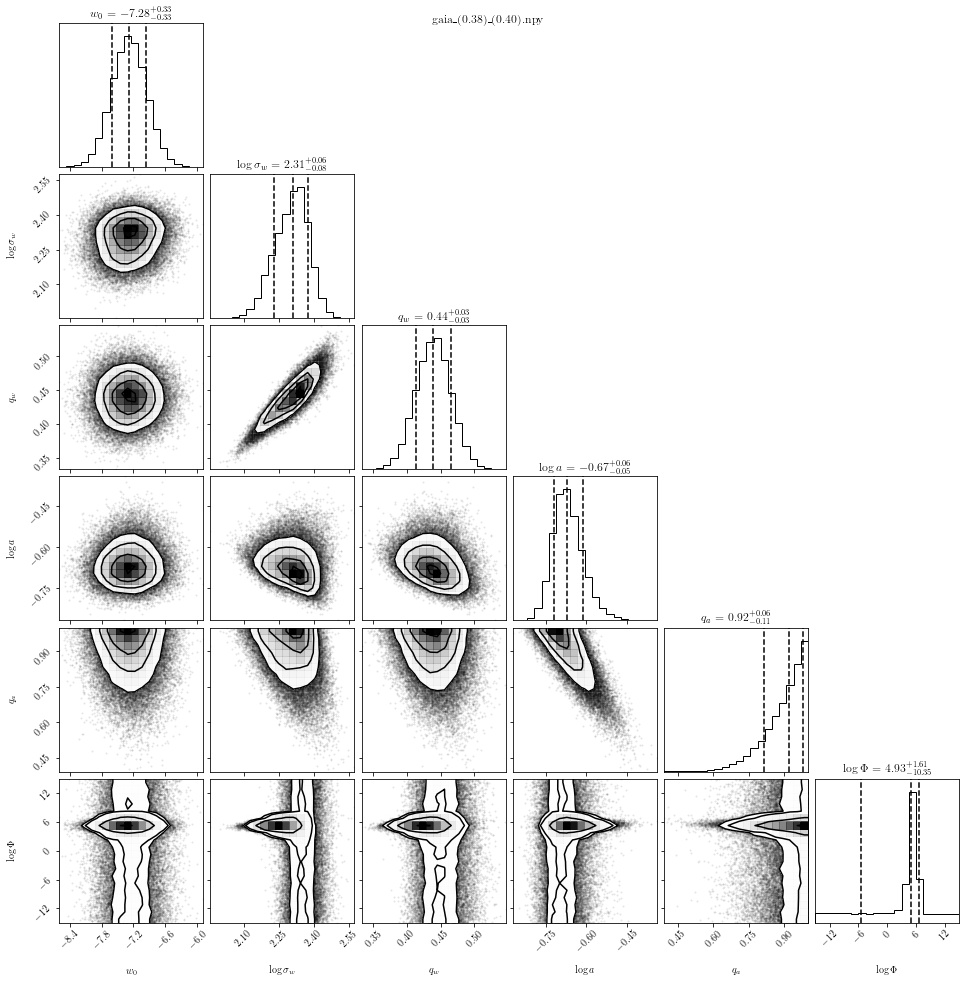

calculating nz...


100%|██████████| 60000/60000 [00:04<00:00, 13112.81it/s]


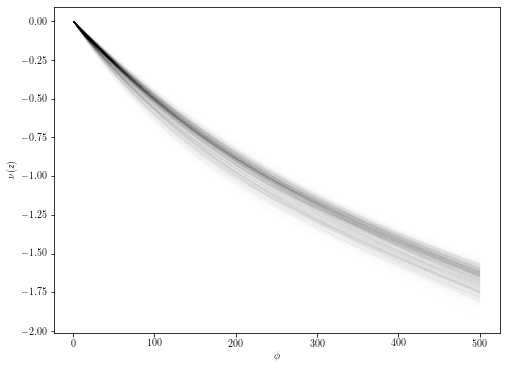

calculating histogram...


 89%|████████▉ | 890/1000 [00:04<00:00, 205.41it/s]

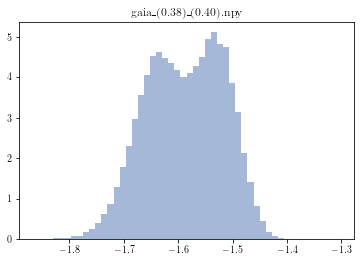

100%|█████████▉| 999/1000 [00:05<00:00, 198.60it/s]

done gaia_(0.38)_(0.40).npy





In [38]:
for file in files:
    name = file.split('/')[-1]
    flat_samples = np.load(file)
    fig = corner.corner(
        flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True
    )
    fig.suptitle(name)
    plt.show()
    phis = np.linspace(1, phi_max, 1000)
    N = len(flat_samples)
    log_zmod_phi = np.empty((N, len(phis)))
    print("calculating nz...")
    for i in tqdm(range(N)):
        th = flat_samples[i]
        log_sigmaw = th[1]
        q_sigmaw = th[2]
        log_a = th[3]
        q_a = th[4]
        sigmaw1 = np.exp(log_sigmaw)
        sigmaw2 = sigmaw1 / q_sigmaw
        a1 = np.exp(log_a)
        a2 = a1 * q_a
        atot = a1 + a2
        zmod_phi_i = (a1*np.exp(-phis/sigmaw1**2)+a2*np.exp(-phis/sigmaw2**2))/atot
        log_zmod_phi[i] = np.log(zmod_phi_i)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(phis, log_zmod_phi[::60].T, 'k', alpha=0.005)
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\nu(z)$')
    plt.show()
    med = np.median(log_zmod_phi, axis=0)
    mad = mad_func(log_zmod_phi, axis=0)
    partition = 50
    pred = np.empty((len(phis), 2, partition))
    phi_mod = phis
    print("calculating histogram...")
    for i, (log_zmod_phi_i, med_i, mad_i) in enumerate(zip(log_zmod_phi.T, med, tqdm(mad))):
        mask = np.abs(log_zmod_phi_i-med_i) < 5*mad_i
        log_zmod_phi_i = log_zmod_phi_i[mask]
        low = med_i-5*mad_i
        high = med_i+5*mad_i
        log_znum_edge = np.linspace(low, high, partition+1)
        dy = log_znum_edge[1]-log_znum_edge[0]
        log_znum_mod = (log_znum_edge[1:]+log_znum_edge[:-1])/2
        znum_weight, _ = np.histogram(log_zmod_phi_i, bins=log_znum_edge)
        area = znum_weight.sum()*dy
        znum_weight = znum_weight/area
        pred_i = np.array([np.exp(log_znum_mod), znum_weight])
        pred[i] = pred_i
        if i == 900:
            plt.bar(log_znum_mod, znum_weight, width=dy, alpha=0.5)
            plt.title(name)
            plt.show()
    np.save(join(data_dir, name), pred)
    print("done", name)
    print("\n\n")